In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

In [2]:
hd=pd.read_excel("cleveland.xlsx")

In [3]:
hd=hd.drop(hd.index[172], axis=0)

X = hd.iloc[:, :13]

y = hd.iloc[:, 13]
y = y.replace(["negative", "positive"], [0, 1])

In [4]:
std=StandardScaler()
X_std=std.fit_transform(X)

pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_std)

#### Real Heart Disease Distribution

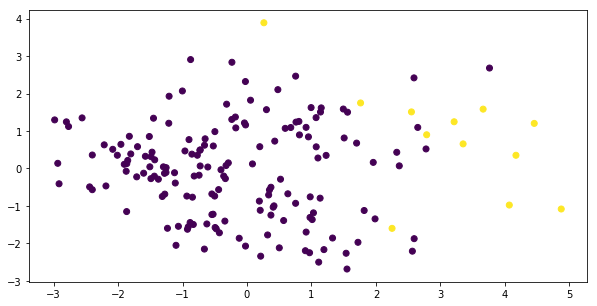

In [5]:
plt.figure(figsize=(10,5))
plt.scatter(X_pca.T[0], X_pca.T[1], c=y)
plt.show()

K-Means Scores:
- ARI: 0.6201351808870379
- Silhouette: 0.45994823920518635

Hierarchical Clustering Scores:
- ARI: 0.07640391596464523
- Silhouette: 0.1138996778946806

### 1st Question:

In [6]:
GM=GaussianMixture(n_components=2, random_state=286)
gmm=GM.fit_predict(X_std)

In [7]:
print("ARI: {}\n"
      .format(metrics.adjusted_rand_score(y, gmm)))
print("Silhoutte: {}"
      .format(metrics.silhouette_score(X_std, gmm, metric='euclidean')))

ARI: 0.05090579457145354

Silhoutte: 0.1419446728803837


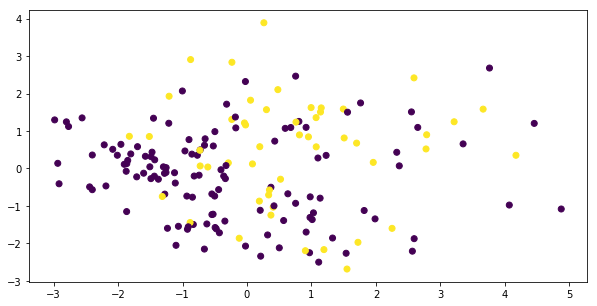

In [8]:
plt.figure(figsize=(10,5))
plt.scatter(X_pca.T[0], X_pca.T[1], c=gmm)
plt.show()

Gussian Mixture Model does a bad job and bBest algoritm is K-Means for this dataset.

### 2nd Question:

In [9]:
types=["full", "tied", "diag","spherical"]

gmm=pd.DataFrame()

print("-"*30)

for i in types:
    GM=GaussianMixture(n_components=2, random_state=286, covariance_type=i)
    gmm=GM.fit_predict(X_std)
    
    print("Covariance Type = {}\n".format(i))
    print("ARI       : {:.4f}".format(metrics.adjusted_rand_score(y, gmm)))
    print("Silhoutte : {:.4f}\n".format(metrics.silhouette_score(X_std, gmm, metric='euclidean')))
    print("-"*30)

------------------------------
Covariance Type = full

ARI       : 0.0509
Silhoutte : 0.1419

------------------------------
Covariance Type = tied

ARI       : 0.0329
Silhoutte : 0.0992

------------------------------
Covariance Type = diag

ARI       : 0.1143
Silhoutte : 0.1209

------------------------------
Covariance Type = spherical

ARI       : -0.0085
Silhoutte : 0.1098

------------------------------


For this dataset, diagonal covariance matrix performs the best with 0.1143 ARI and 0.1209 Silhouette scores.